In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.utilities.lambdify import lambdify

# Lagrange interpolation

In [4]:
def lagrange_l(x_ls: list, x_j):
    x = symbols('x')
    lg = 1
    n = len(x_ls)
    for i in range(n):
        if x_j == x_ls[i]:
            continue
        lg *= (x - x_ls[i]) / (x_j - x_ls[i])
    return lg


def lagrange_poly(x, y):
    if len(x) != len(y):
        raise ValueError("x and y are not same length")

    n = len(x)
    # x = symbols('x')

    L = 0
    for i in range(n):
        L += y[i] * lagrange_l(x, x[i])
    return L

# Newton interpolation

In [5]:
def get_a(x: list, y: list):
    a_table = np.zeros(shape=(len(y) - 1, len(y) - 1))
    n = a_table.shape[0]

    for i in range(n):
        a_table[0, i] = (y[i + 1] - y[i]) / (x[i+1] - x[i])

    for i in range(1, n):
        for j in range(n - i):
            a_table[i, j] = (a_table[i - 1, j + 1] - a_table[i - 1, j]) / (x[i+1+j] - x[j])

    return a_table


def newton_poly(x_ls: list, y_ls: list):
    if len(x_ls) != len(y_ls):
        raise TypeError("x and y must be same size")

    n = len(x_ls)

    x = symbols('x')
    N = 0
    a_table = get_a(x_ls, y_ls)
    for i in range(n):
        if i == 0:
            N += y_ls[0]
            continue
        x_poly = 1
        for j in range(i):
            x_poly *= (x-x_ls[j])

        N += a_table[i-1, 0] * x_poly

    return N

## Min squares

In [6]:
def sum_of_pow(x, pow):
    n = x.shape[0]
    sum = 0
    for i in range(n):
        sum += np.power(x[i], pow)
    return sum


def sum_x_y_pows(x, y, pow):
    n = x.shape[0]
    sum = 0

    for i in range(n):
        sum += y[i] * np.power(x[i], pow)
    return sum


def min_square(x, y, m):
    if y.shape[0] < m:
        raise Exception("Low size")

    if x.shape[0] != y.shape[0]:
        raise Exception("size error")
    n = x.shape[0]

    A = np.zeros(shape=(m+1, m+1))
    for i in range(m+1):
        for j in range(m+1):
            A[i, j] = sum_of_pow(x, i+j)

    b = np.zeros(shape=m + 1)
    for i in range(m+1):
        b[i] = sum_x_y_pows(x, y, i)

    a_vec = np.linalg.solve(A, b)
    return a_vec

def get_best_approx_poly(x, y):
    all_polys = list()
    for i in range(1, x.shape[0]):
            all_polys.append(min_square(x, y, i))
    return all_polys

In [7]:
class tests:
    x_1 = [2, 4, 5]
    y_1 = [1, 15, 28]
    point_1 = 3

    x_2 = [5, 6, 9, 11]
    y_2 = [12, 13, 14, 16]
    point_2 = 7

    x_3 = [-5, -1, 0, 2]
    y_3 = [-2, 6, 1, 3]
    point_3 = 1

    x_4 = [0, 1, 2, 3]
    y_4 = [5, 1, 7, 29]
    point_4 = 2.5

    x_5 = [0.1, 0.5, 0.7, 1.2, 1.5]
    y_5 = [1.2, 2.7, 3.8, 4.7, 6]
    point_5 = 0.8
    
    x_6 = [3/2, -1/3, 0, 1/6, 0.5]
    y_6 = [-1, -np.sqrt(3)/2, 0, 0.5, 1]
    point_6 = 0.25

# Tests examples


## Test 1

In [8]:
x = tests.x_1
y = tests.y_1
x_var = symbols('x')
point = tests.point_1


newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')


	Data:
x = [2, 4, 5]
y = [1, 15, 28]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = (5/3 - x/3)*(2 - x/2) + 15*(5 - x)*(x/2 - 1) + 28*(x/3 - 2/3)*(x - 4)
Interpolation point: x = 3
Lagrange poly result on x = 3
L(3) = 6.0000
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 7.0*x + 2.0*(x - 4)*(x - 2) - 13.0
Interpolation point: x = 3
Newton poly result on x = 3
N(3) = 6.0000


## Lagrange Polynomial

In [9]:
lagrange

(5/3 - x/3)*(2 - x/2) + 15*(5 - x)*(x/2 - 1) + 28*(x/3 - 2/3)*(x - 4)

In [10]:
simplify(lagrange)

2*x**2 - 5*x + 3

## Newton Polynomial

In [11]:
newton

7.0*x + 2.0*(x - 4)*(x - 2) - 13.0

In [12]:
simplify(newton)

2.0*x**2 - 5.0*x + 3.0

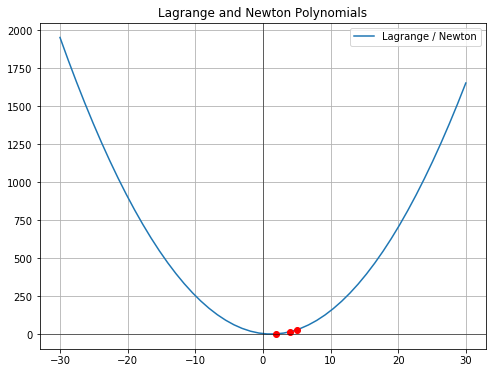

In [13]:
# plt.style.use('seaborn-poster')
X = np.linspace(-30, 30, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

## Find point value 

Point!
x = 3
L(3) = 6.0
N(3) = 6.0


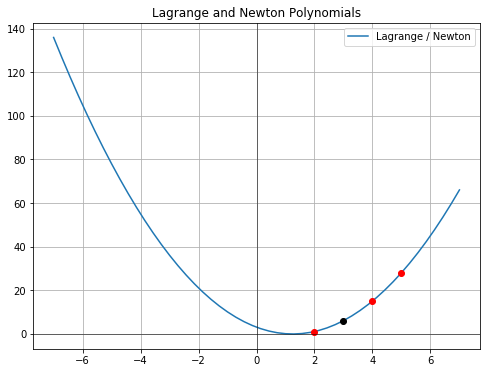

In [14]:
point_x = tests.point_1
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-7, 7, 50, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

## Best apporximation

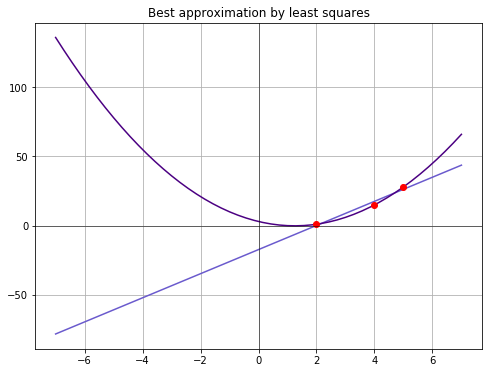

In [15]:
import numpy
x = np.array(tests.x_1)
y = np.array(tests.y_1)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-7, 7)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(tests.x_1, tests.y_1, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [16]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([-17.28571429,   8.71428571], domain=[-1,  1], window=[-1,  1])

In [17]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([ 3., -5.,  2.], domain=[-1,  1], window=[-1,  1])

## Test 2


In [18]:
x = tests.x_2
y = tests.y_2
point = tests.point_2
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [5, 6, 9, 11]
y = [12, 13, 14, 16]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = 12*(11/6 - x/6)*(9/4 - x/4)*(6 - x) + 13*(11/5 - x/5)*(3 - x/3)*(x - 5) + 14*(11/2 - x/2)*(x/4 - 5/4)*(x/3 - 2) + 16*(x/6 - 5/6)*(x/5 - 6/5)*(x/2 - 9/2)
Interpolation point: x = 7
Lagrange poly result on x = 7
L(7) = 13.4667
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 1.0*x + 0.05*(x - 9)*(x - 6)*(x - 5) - 0.166666666666667*(x - 6)*(x - 5) + 7.0
Interpolation point: x = 7
Newton poly result on x = 7
N(7) = 13.4667


## Lagrange Polynomial

In [19]:
lagrange

12*(11/6 - x/6)*(9/4 - x/4)*(6 - x) + 13*(11/5 - x/5)*(3 - x/3)*(x - 5) + 14*(11/2 - x/2)*(x/4 - 5/4)*(x/3 - 2) + 16*(x/6 - 5/6)*(x/5 - 6/5)*(x/2 - 9/2)

In [20]:
simplify(lagrange)

x**3/20 - 7*x**2/6 + 557*x/60 - 23/2

## Newton Polynomial

In [21]:
newton

1.0*x + 0.05*(x - 9)*(x - 6)*(x - 5) - 0.166666666666667*(x - 6)*(x - 5) + 7.0

In [22]:
simplify(newton)

0.05*x**3 - 1.16666666666667*x**2 + 9.28333333333333*x - 11.5

In [23]:
point_x = tests.point_2
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-13, 20, 50, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

Point!
x = 7


TypeError: 'numpy.ndarray' object is not callable

## Find point value 

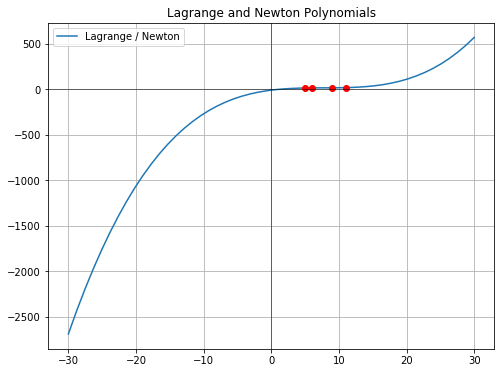

In [24]:
# plt.style.use('seaborn-poster')
X = np.linspace(-30, 30, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()


## Best apporximation

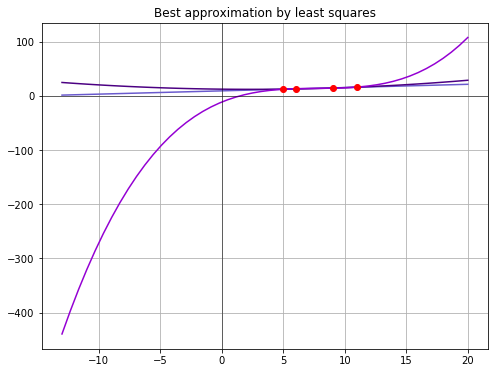

In [25]:
import numpy
x = np.array(tests.x_2)
y = np.array(tests.y_2)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-13, 20)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(tests.x_2, tests.y_2, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [26]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([9.06593407, 0.6043956 ], domain=[-1,  1], window=[-1,  1])

In [27]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([12.16949153, -0.25141243,  0.05367232], domain=[-1,  1], window=[-1,  1])

In [28]:
numpy.polynomial.polynomial.Polynomial(all_best[2])


Polynomial([-11.5       ,   9.28333333,  -1.16666667,   0.05      ], domain=[-1,  1], window=[-1,  1])

In [29]:
class task:
    k = 5
    m = 2.5

    x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    p = np.array([0, 0.41, 0.79, 1.13, 1.46, 1.76, 2.04, 2.3, 2.55, 2.79, 3.01])

    y = p + (-1)**k * m
    point = 0.47

## Task


In [30]:
x = task.x
y = task.y
point = task.point
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}\n"
      f"k = {task.k}\n"
      f"m = {task.m}\n")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [-2.5  -2.09 -1.71 -1.37 -1.04 -0.74 -0.46 -0.2   0.05  0.29  0.51]
k = 5
m = 2.5

--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = -20.9*x*(1.11111111111111 - 1.11111111111111*x)*(1.125 - 1.25*x)*(1.14285714285714 - 1.42857142857143*x)*(1.16666666666667 - 1.66666666666667*x)*(1.2 - 2.0*x)*(1.25 - 2.5*x)*(1.33333333333333 - 3.33333333333333*x)*(1.5 - 5.0*x)*(2.0 - 10.0*x) - 8.55*x*(1.25 - 1.25*x)*(1.28571428571429 - 1.42857142857143*x)*(1.33333333333333 - 1.66666666666667*x)*(1.4 - 2.0*x)*(1.5 - 2.5*x)*(1.66666666666667 - 3.33333333333333*x)*(2.0 - 5.0*x)*(3.0 - 10.0*x)*(10.0*x - 1.0) - 4.56666666666667*x*(1.42857142857143 - 1.42857142857143*x)*(1.5 - 1.66666666666667*x)*(1.6 - 2.0*x)*(1.75 - 2.5*x)*(2.0 - 3.33333333333333*x)*(2.5 - 5.0*x)*(4.0 - 10.0*x)*(5.0*x - 0.5)*(10.0*x - 2.0) - 2.6*x*(1.66666666666667 - 1.66666666666667*x)*(1.8 - 2.0*x)*(2.0 - 2

## Lagrange Polynomial

In [31]:
lagrange

-20.9*x*(1.11111111111111 - 1.11111111111111*x)*(1.125 - 1.25*x)*(1.14285714285714 - 1.42857142857143*x)*(1.16666666666667 - 1.66666666666667*x)*(1.2 - 2.0*x)*(1.25 - 2.5*x)*(1.33333333333333 - 3.33333333333333*x)*(1.5 - 5.0*x)*(2.0 - 10.0*x) - 8.55*x*(1.25 - 1.25*x)*(1.28571428571429 - 1.42857142857143*x)*(1.33333333333333 - 1.66666666666667*x)*(1.4 - 2.0*x)*(1.5 - 2.5*x)*(1.66666666666667 - 3.33333333333333*x)*(2.0 - 5.0*x)*(3.0 - 10.0*x)*(10.0*x - 1.0) - 4.56666666666667*x*(1.42857142857143 - 1.42857142857143*x)*(1.5 - 1.66666666666667*x)*(1.6 - 2.0*x)*(1.75 - 2.5*x)*(2.0 - 3.33333333333333*x)*(2.5 - 5.0*x)*(4.0 - 10.0*x)*(5.0*x - 0.5)*(10.0*x - 2.0) - 2.6*x*(1.66666666666667 - 1.66666666666667*x)*(1.8 - 2.0*x)*(2.0 - 2.5*x)*(2.33333333333333 - 3.33333333333333*x)*(3.0 - 5.0*x)*(5.0 - 10.0*x)*(3.33333333333333*x - 0.333333333333333)*(5.0*x - 1.0)*(10.0*x - 3.0) - 1.48*x*(2.0 - 2.0*x)*(2.25 - 2.5*x)*(2.66666666666667 - 3.33333333333333*x)*(3.5 - 5.0*x)*(6.0 - 10.0*x)*(2.5*x - 0.25)*(

In [32]:
simplify(lagrange)

3279.32098765417*x**10 - 16823.7433862425*x**9 + 37136.2433862428*x**8 - 46113.591269841*x**7 + 35322.1643518546*x**6 - 17192.6215277798*x**5 + 5268.12692901256*x**4 - 966.267030423305*x**3 + 92.7493452380997*x**2 + 0.628214285714273*x - 2.5

## Newton Polynomial

In [33]:
newton

3279.32098765431*x*(x - 0.9)*(x - 0.8)*(x - 0.7)*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) - 2066.79894179893*x*(x - 0.8)*(x - 0.7)*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) + 1165.6746031746*x*(x - 0.7)*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) - 575.396825396822*x*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) + 236.11111111111*x*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) - 74.9999999999996*x*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) + 16.6666666666665*x*(x - 0.3)*(x - 0.2)*(x - 0.1) - 1.66666666666662*x*(x - 0.2)*(x - 0.1) - 1.50000000000001*x*(x - 0.1) + 4.1*x - 2.5

In [34]:
simplify(newton)

3279.32098765431*x**10 - 16823.7433862433*x**9 + 37136.2433862432*x**8 - 46113.5912698411*x**7 + 35322.1643518517*x**6 - 17192.6215277777*x**5 + 5268.12692901232*x**4 - 966.267030423276*x**3 + 92.7493452380948*x**2 + 0.628214285714305*x - 2.5

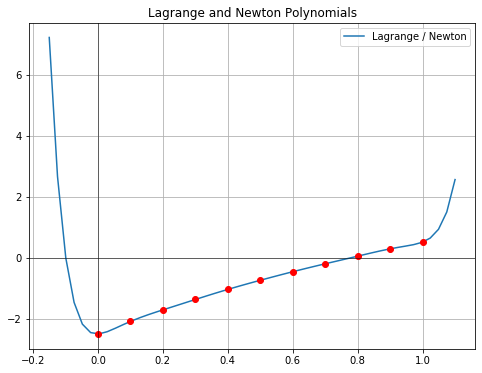

In [35]:
# plt.style.use('seaborn-poster')
X = np.linspace(-0.15, 1.1, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

## Find point value 

Point!
x = 0.47
L(0.47) = -0.8273479202911991
N(0.47) = -0.8273479202911971


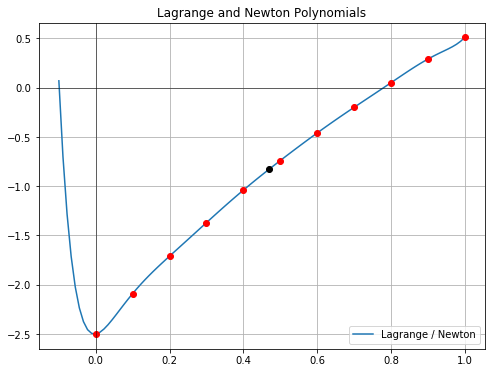

In [36]:
point_x = task.point
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-0.1, 1, 100, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()


## Best approximation

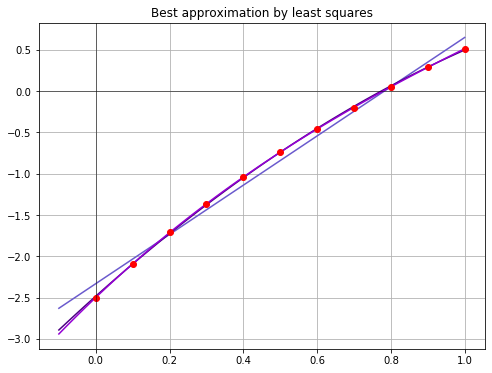

In [37]:
import numpy
x = np.array(task.x)
y = np.array(task.y)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    if i == 3:
        break
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
        
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-0.1, 1)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(task.x, task.y, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [38]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([-2.33136364,  2.97909091], domain=[-1,  1], window=[-1,  1])

In [39]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([-2.48293706,  3.98958042, -1.01048951], domain=[-1,  1], window=[-1,  1])

In [49]:
numpy.polynomial.polynomial.Polynomial(all_best[2])


Polynomial([-2.49881119,  4.24180264, -1.67191142,  0.44094794], domain=[-1,  1], window=[-1,  1])

In [54]:
x = 0.47


In [60]:
-2.49881118881118+4.241802641802528*x - 1.6719114219111515*x**2 +0.4409479409477706*x**3

-0.8287086421911446

In [61]:
numpy.polynomial.polynomial.Polynomial(all_best[3])


Polynomial([-2.49986014,  4.27822455, -1.85402098,  0.73232323, -0.14568765], domain=[-1,  1], window=[-1,  1])

In [62]:
-2.4998601398601306+4.27822455322443*x-1.854020979020643*x**2+0.7323232323229409*x**3-0.1456876456875797*x**4

-0.8297249315268083

In [63]:
numpy.polynomial.polynomial.Polynomial(all_best[4])

Polynomial([-2.49966783,  4.26314977, -1.72982226,  0.38243007,  0.25495338,
       -0.16025641], domain=[-1,  1], window=[-1,  1])

In [64]:
-2.499667832167862+4.263149766902962*x-1.7298222610999094*x**2+0.38243007000968793*x**3+0.2549533798611141*x**4-0.16025641021923512*x**5

-0.8296346311582358